In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import cv2
from keras.datasets import fashion_mnist#download mnist data and split into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout#create model
from keras.optimizers import SGD

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array



In [ ]:
print(os.listdir("/kaggle/input/cat-dog-numpy"))

In [ ]:
CAT_TRAIN_PATH="/kaggle/input/cat-and-dog/training_set/training_set/cats/"
DOG_TRAIN_PATH="/kaggle/input/cat-and-dog/training_set/training_set/dogs/"
CAT_TEST_PATH="/kaggle/input/cat-and-dog/test_set/test_set/cats/"
DOG_TEST_PATH="/kaggle/input/cat-and-dog/test_set/test_set/dogs/"

In [ ]:
def preprocess_img(img):
    dim=(100,100)
    res = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    return res
    

In [ ]:
#Building up datasets
l=len(list(os.listdir(CAT_TRAIN_PATH)))
index=0
lst=[]
y=[]
for file in os.listdir(CAT_TRAIN_PATH):
    index+=1
    #print(file)
    if(file=="_DS_Store"):
        continue
    im=plt.imread(CAT_TRAIN_PATH+str(file))
    im=preprocess_img(im)
    lst.append(im)
    y.append(1)
    if(index%40==0):
        print("Finished Reading "+str(index)+"/"+str(l))
        #print(im.shape)
        #print(lst.shape)
        #print(y.shape)
    
l=len(list(os.listdir(DOG_TRAIN_PATH)))
index=0
for file in os.listdir(DOG_TRAIN_PATH):
    index+=1
    #print(file)
    if(file=="_DS_Store"):
        continue
    im=plt.imread(DOG_TRAIN_PATH+str(file))
    im=preprocess_img(im)
    lst.append(im)
    y.append(0)
    if(index%40==0):
        print("Finished Reading "+str(index)+"/"+str(l))


        

In [ ]:

print(np.array(lst).shape)
print(np.array(y).shape)

In [ ]:
X_train=np.array(lst)
Y_train=np.array(y)
np.savez("CAT_DOG_X_train",X_train)
np.savez("CAT_DOG_Y_train",Y_train)
print(X_train.shape)
print(Y_train.shape)


In [ ]:
#Building up datasets
l=len(list(os.listdir(CAT_TEST_PATH)))
index=0
lst=[]
y=[]
for file in os.listdir(CAT_TEST_PATH):
    index+=1
    #print(file)
    if(file=="_DS_Store"):
        continue
    im=plt.imread(CAT_TEST_PATH+str(file))
    im=preprocess_img(im)
    lst.append(im)
    y.append(1)
    if(index%40==0):
        print("Finished Reading "+str(index)+"/"+str(l))
        #print(im.shape)
        #print(lst.shape)
        #print(y.shape)
    
l=len(list(os.listdir(DOG_TEST_PATH)))
index=0
for file in os.listdir(DOG_TEST_PATH):
    index+=1
    #print(file)
    if(file=="_DS_Store"):
        continue
    im=plt.imread(DOG_TEST_PATH+str(file))
    im=preprocess_img(im)
    lst.append(im)
    y.append(0)
    if(index%40==0):
        print("Finished Reading "+str(index)+"/"+str(l))


        

In [ ]:
X_test=np.array(lst)
Y_test=np.array(y)
print(X_test.shape)
print(Y_test.shape)
np.save("CAT_DOG_X_test",X_test)
np.save("CAT_DOG_Y_test",Y_test)

# Till last part we converted into numpy arrays and stored them. Now we inputted the same arrays and we would read from them

# GETTING DATA INTO THE DIFFERENT SETS

In [3]:
X_TRAIN_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_X_train.npz"
X_TEST_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_X_test.npy"
Y_TRAIN_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_Y_train.npz"
Y_TEST_FILE="/kaggle/input/cat-dog-numpy/CAT_DOG_Y_test.npy"

In [4]:
a=np.load(X_TRAIN_FILE)
X_train=a.f.arr_0
a=np.load(Y_TRAIN_FILE)
Y_train=a.f.arr_0
a=np.load(X_TEST_FILE)
X_test=a
a=np.load(Y_TEST_FILE)
Y_test=a


In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8005, 100, 100, 3)
(8005,)
(2023, 100, 100, 3)
(2023,)


In [6]:
print("Distribution of cats and dogs in the different sets")
print("TRAIN  :  "+str(sum(Y_train==1))+" cats vs "+str(sum(Y_train==0))+" dogs")
print("TEST  :  "+str(sum(Y_test==1))+" cats vs "+str(sum(Y_test==0))+" dogs")

Distribution of cats and dogs in the different sets
TRAIN  :  4000 cats vs 4005 dogs
TEST  :  1011 cats vs 1012 dogs


In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(6003, 100, 100, 3)
(6003,)
(2002, 100, 100, 3)
(2002,)
(2023, 100, 100, 3)
(2023,)


In [9]:
print("Distribution of cats and dogs in the different sets")
print("TRAIN  :  "+str(sum(Y_train==1))+" cats vs "+str(sum(Y_train==0))+" dogs")
print("VAL  :  "+str(sum(Y_val==1))+" cats vs "+str(sum(Y_val==0))+" dogs")
print("TEST  :  "+str(sum(Y_test==1))+" cats vs "+str(sum(Y_test==0))+" dogs")

Distribution of cats and dogs in the different sets
TRAIN  :  2982 cats vs 3021 dogs
VAL  :  1018 cats vs 984 dogs
TEST  :  1011 cats vs 1012 dogs


Images 1 to 5 :
1


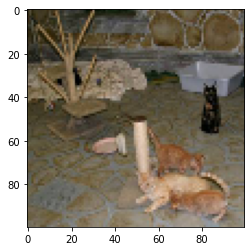

1


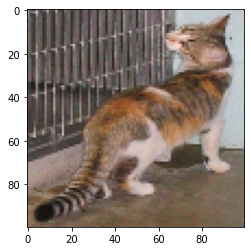

0


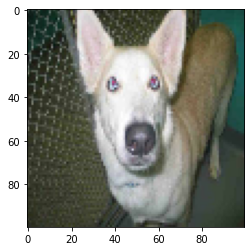

0


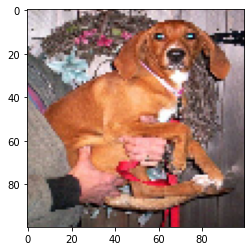

1


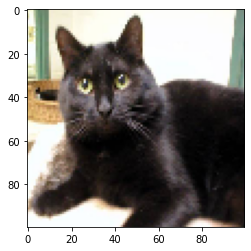

In [10]:

print("Images 1 to 5 :")
for i in range(0,5):
    plt.imshow(X_train[i])
    print(Y_train[i])
    plt.show()

# UTILITY FUNCTIONS

In [11]:
def normalize_X(X):
    X_norm=X/255
    return X_norm

In [12]:


def input_and_run(model,X_train,X_val,X_test,y_train,y_val,y_test,alpha=0.01,num_epochs=10):
    #Pre processing the data
    X_train=normalize_X(X_train)
    X_val=normalize_X(X_val)
    X_test=normalize_X(X_test)
    X_train, y_train = shuffle(X_train, y_train, random_state=42)
    X_val, y_val = shuffle(X_val, y_val, random_state=42)
    X_test, y_test = shuffle(X_test, y_test, random_state=42)
    
    #compile model using accuracy to measure model performance
    opt = keras.optimizers.Adam(learning_rate=alpha)
    opt2=SGD(lr=alpha, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
    
    #train the model
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs)
    
    #Getting results
    result = model.evaluate(X_train,y_train)
    #print(result)
    print("Training accuracy = "+str(result[1]*100))
    result = model.evaluate(X_val,y_val)
    #print(result)
    print("Validation accuracy = "+str(result[1]*100))
    result = model.evaluate(X_test,y_test)
    #print(result)
    print("Test accuracy = "+str(result[1]*100))



In [13]:
##BUILDING THE MODEL 1

model1 = Sequential()#add model layers

model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(1, activation='sigmoid'))

print(model1.summary())
input_and_run(model1,X_train,X_val,X_test,Y_train,Y_val,Y_test,alpha=0.0001,num_epochs=20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)            

In [ ]:
##BUILDING THE MODEL 1

model2 = Sequential()#add model layers

model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.5))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.5))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.5))
model2.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

print(model2.summary())
input_and_run(model2,X_train,X_val,X_test,Y_train,Y_val,Y_test,alpha=0.001,num_epochs=200)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 25, 25, 128)      